In [2]:
import keras

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [7]:
import numpy as np

def vectorize_sequence(sequence, dimension=10000):
    results = np.zeros((len(sequence), dimension))
    for i, sequence in enumerate(sequence):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
x_train.shape

(25000, 10000)

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
y_train[0]

np.float32(1.0)

In [12]:
y_train.shape

(25000,)

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/Users/jiduobin/Documents/GitHub/deep-learning-with-python-notebooks/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
network_1 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=500,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7717 - loss: 0.5198 - val_accuracy: 0.8571 - val_loss: 0.3990
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8939 - loss: 0.3199 - val_accuracy: 0.8823 - val_loss: 0.3126
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9173 - loss: 0.2429 - val_accuracy: 0.8877 - val_loss: 0.2842
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9376 - loss: 0.1909 - val_accuracy: 0.8834 - val_loss: 0.2927
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9493 - loss: 0.1581 - val_accuracy: 0.8864 - val_loss: 0.2773
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9590 - loss: 0.1325 - val_accuracy: 0.8842 - val_loss: 0.2890
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9631 - loss: 0.1144 - val_accuracy: 0.8860 - val_loss: 0.3001
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9700 - loss: 0.0964 - val_accuracy: 0.8839 - val_loss

In [18]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
network_2 = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=500,
                        validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9975 - loss: 0.0130 - val_accuracy: 0.8681 - val_loss: 0.6035
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9981 - loss: 0.0098 - val_accuracy: 0.8700 - val_loss: 0.6230
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9982 - loss: 0.0094 - val_accuracy: 0.8504 - val_loss: 0.7573
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9994 - loss: 0.0049 - val_accuracy: 0.8697 - val_loss: 0.6580
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9969 - loss: 0.0113 - val_accuracy: 0.8702 - val_loss: 0.6759
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9999 - loss: 0.0028 - val_accuracy: 0.8684 - val_loss: 0.6913
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9999 - loss: 0.0025 - val_accuracy: 0.8688 - val_loss: 0.7281
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9989 - loss: 0.0066 - val_accuracy: 0.8677 - val_loss

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,612 (1.22 MB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,307 (626.20 KB)

In [21]:
network_1_dict = network_1.history
network_1_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [22]:
network_1_dict['loss']

[0.5197708606719971,
 0.31991422176361084,
 0.24293528497219086,
 0.19094032049179077,
 0.1581161469221115,
 0.13253077864646912,
 0.11444024741649628,
 0.09638863801956177,
 0.08416431397199631,
 0.0687694251537323,
 0.05813087150454521,
 0.04842320829629898,
 0.04054061323404312,
 0.034377917647361755,
 0.027550656348466873,
 0.023322876542806625,
 0.019561445340514183,
 0.019337181001901627,
 0.009878162294626236,
 0.015144961886107922]

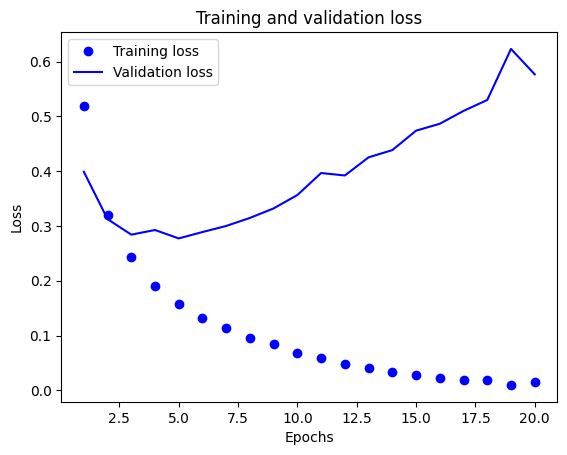

In [23]:
import matplotlib.pyplot as plt

acc = network_1_dict['accuracy']
val_acc = network_1_dict['val_accuracy']
loss = network_1_dict['loss']
val_loss = network_1_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [24]:
model.save('./network_1.h5')

In [25]:
model.predict(x_test, batch_size=500)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[7.4683112e-04],
       [1.0000000e+00],
       [8.4737515e-01],
       ...,
       [8.1259393e-05],
       [4.4522963e-05],
       [9.8716283e-01]], dtype=float32)